### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


0. Conociendo los Datos

In [4]:
tienda[["Producto", "Categoría del Producto", "Calificación"]].head()


,Producto,Categoría del Producto,Calificación
0,Asistente virtual,Electrónicos,4
1,Mesa de comedor,Muebles,1
2,Juego de mesa,Juguetes,1
3,Microondas,Electrodomésticos,4
4,Silla de oficina,Muebles,5


#1. Análisis de facturación



El análisis de facturación mostró diferencias claras entre las tiendas:
+ Las tiendas 1, 2 y 3 presentan ingresos relativamente similares y superiores.
+ La Tienda 4 registra el menor ingreso total, indicando menor capacidad de generación de ingresos y una debilidad financiera importante.

In [11]:
import pandas as pd

# Cálculo de ingresos por tienda
ingreso_tienda1 = tienda["Precio"].sum()
ingreso_tienda2 = tienda2["Precio"].sum()
ingreso_tienda3 = tienda3["Precio"].sum()
ingreso_tienda4 = tienda4["Precio"].sum()

# Diccionario con valores numéricos
ingresos = {
    "Tienda 1": ingreso_tienda1,
    "Tienda 2": ingreso_tienda2,
    "Tienda 3": ingreso_tienda3,
    "Tienda 4": ingreso_tienda4
}

# Crear tabla
tabla_ingresos = pd.DataFrame(
    list(ingresos.items()),
    columns=["Tienda", "Ingreso"]
)

# Calcular total general
total_ingresos = tabla_ingresos["Ingreso"].sum()

# Agregar fila TOTAL
tabla_ingresos.loc[len(tabla_ingresos)] = ["TOTAL", total_ingresos]

# Formatear a moneda
tabla_ingresos["Ingreso"] = tabla_ingresos["Ingreso"].map(
    lambda x: f"${x:,.0f}"
)

# Mostrar tabla
tabla_ingresos





,Tienda,Ingreso
0,Tienda 1,"$1,150,880,400"
1,Tienda 2,"$1,116,343,500"
2,Tienda 3,"$1,098,019,600"
3,Tienda 4,"$1,038,375,700"
4,TOTAL,"$4,403,619,200"


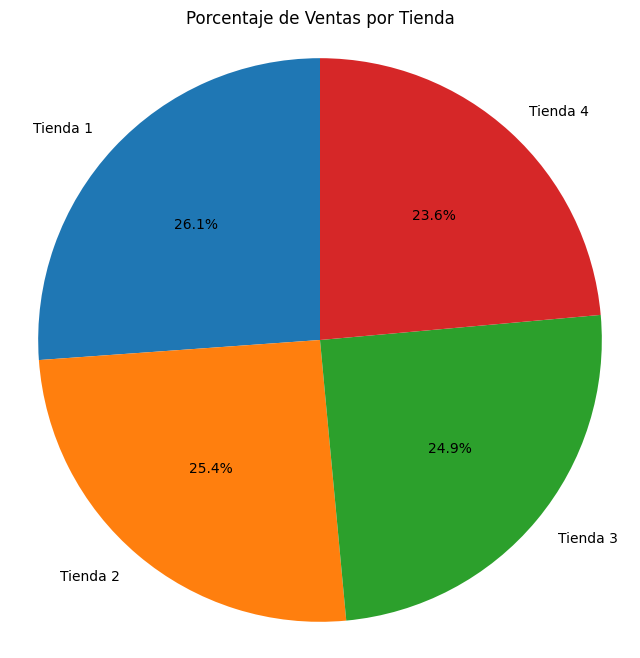

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear DataFrame
tabla_pie = pd.DataFrame(
    list(ingresos.items()),
    columns=["Tienda", "Ingreso"]
)

# =========================
# Gráfico de torta
# =========================
plt.figure(figsize=(8, 8))

plt.pie(
    tabla_pie["Ingreso"],
    labels=tabla_pie["Tienda"],
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Porcentaje de Ventas por Tienda")
plt.axis("equal")  # Mantiene el círculo perfecto

plt.show()



# 2. Ventas por categoría

In [50]:
import pandas as pd

tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

resultados = {}

for nombre_tienda, df in tiendas.items():

    resumen = (
        df
        .groupby("Producto")
        .agg(
            Cantidad_Vendida=("Producto", "count"),
            Ingreso_Total=("Precio", "sum")
        )
        .sort_values(by="Ingreso_Total", ascending=False)
        .reset_index()
    )

    # =========================
    # % participación y acumulado
    # =========================
    total_ingresos = resumen["Ingreso_Total"].sum()

    resumen["% Participación"] = resumen["Ingreso_Total"] / total_ingresos
    resumen["% Acumulado"] = resumen["% Participación"].cumsum()

    # =========================
    # Fila TOTAL
    # =========================
    total_fila = pd.DataFrame([{
        "Producto": "TOTAL",
        "Cantidad_Vendida": resumen["Cantidad_Vendida"].sum(),
        "Ingreso_Total": total_ingresos,
        "% Participación": 1.0,
        "% Acumulado": 1.0
    }])

    resumen_total = pd.concat([resumen, total_fila], ignore_index=True)

    resultados[nombre_tienda] = resumen_total

    # =========================
    # Tabla formateada
    # =========================
    tabla = resumen_total.copy()
    tabla["Ingreso_Total"] = tabla["Ingreso_Total"].map(
        lambda x: f"${x:,.0f} COP"
    )
    tabla["% Participación"] = tabla["% Participación"].map(
        lambda x: f"{x:.1%}"
    )
    tabla["% Acumulado"] = tabla["% Acumulado"].map(
        lambda x: f"{x:.1%}"
    )

    print(f"\n📋 Tabla – Productos con mayores ingresos ({nombre_tienda})")
    display(tabla)




📋 Tabla – Productos con mayores ingresos (Tienda 1)


,Producto,Cantidad_Vendida,Ingreso_Total,% Participación,% Acumulado
0,TV LED UHD 4K,60,"$142,150,200 COP",12.4%,12.4%
1,Refrigerador,54,"$112,143,300 COP",9.7%,22.1%
2,Iphone 15,49,"$97,902,200 COP",8.5%,30.6%
3,Smart TV,44,"$67,452,100 COP",5.9%,36.5%
4,Lavadora de ropa,47,"$65,783,600 COP",5.7%,42.2%
5,Lavavajillas,48,"$62,054,900 COP",5.4%,47.6%
6,Secadora de ropa,58,"$59,062,400 COP",5.1%,52.7%
7,Tablet ABXY,42,"$47,639,800 COP",4.1%,56.8%
8,Batería,53,"$37,693,900 COP",3.3%,60.1%
9,Guitarra eléctrica,47,"$37,292,200 COP",3.2%,63.4%



📋 Tabla – Productos con mayores ingresos (Tienda 2)


,Producto,Cantidad_Vendida,Ingreso_Total,% Participación,% Acumulado
0,Iphone 15,55,"$113,225,800 COP",10.1%,10.1%
1,TV LED UHD 4K,45,"$103,375,000 COP",9.3%,19.4%
2,Refrigerador,49,"$97,632,500 COP",8.7%,28.1%
3,Lavadora de ropa,49,"$66,762,300 COP",6.0%,34.1%
4,Smart TV,40,"$61,142,000 COP",5.5%,39.6%
5,Secadora de ropa,57,"$59,115,100 COP",5.3%,44.9%
6,Lavavajillas,46,"$58,767,500 COP",5.3%,50.2%
7,Tablet ABXY,44,"$56,209,800 COP",5.0%,55.2%
8,Batería,61,"$46,175,300 COP",4.1%,59.3%
9,Celular ABXY,41,"$41,668,900 COP",3.7%,63.1%



📋 Tabla – Productos con mayores ingresos (Tienda 3)


,Producto,Cantidad_Vendida,Ingreso_Total,% Participación,% Acumulado
0,Refrigerador,50,"$99,889,700 COP",9.1%,9.1%
1,TV LED UHD 4K,42,"$96,669,100 COP",8.8%,17.9%
2,Iphone 15,46,"$93,225,700 COP",8.5%,26.4%
3,Smart TV,54,"$78,837,300 COP",7.2%,33.6%
4,Lavavajillas,52,"$64,364,800 COP",5.9%,39.4%
5,Tablet ABXY,48,"$58,440,100 COP",5.3%,44.8%
6,Lavadora de ropa,42,"$57,459,100 COP",5.2%,50.0%
7,Secadora de ropa,45,"$49,798,300 COP",4.5%,54.5%
8,Celular ABXY,44,"$43,419,600 COP",4.0%,58.5%
9,Cama king,56,"$38,834,700 COP",3.5%,62.0%



📋 Tabla – Productos con mayores ingresos (Tienda 4)


,Producto,Cantidad_Vendida,Ingreso_Total,% Participación,% Acumulado
0,Iphone 15,48,"$96,697,500 COP",9.3%,9.3%
1,TV LED UHD 4K,40,"$90,295,300 COP",8.7%,18.0%
2,Smart TV,54,"$82,790,400 COP",8.0%,26.0%
3,Refrigerador,38,"$75,271,900 COP",7.2%,33.2%
4,Tablet ABXY,45,"$56,723,100 COP",5.5%,38.7%
5,Lavavajillas,43,"$55,349,300 COP",5.3%,44.0%
6,Lavadora de ropa,38,"$52,463,600 COP",5.1%,49.1%
7,Secadora de ropa,40,"$42,262,200 COP",4.1%,53.1%
8,Celular ABXY,39,"$40,171,600 COP",3.9%,57.0%
9,Cama king,56,"$37,555,400 COP",3.6%,60.6%


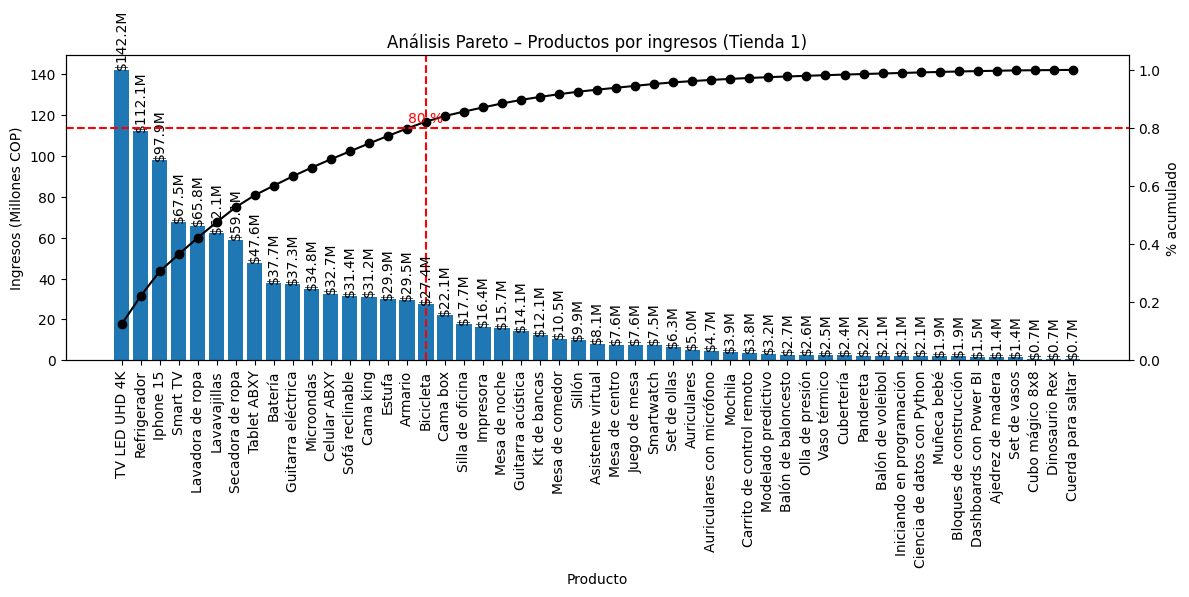

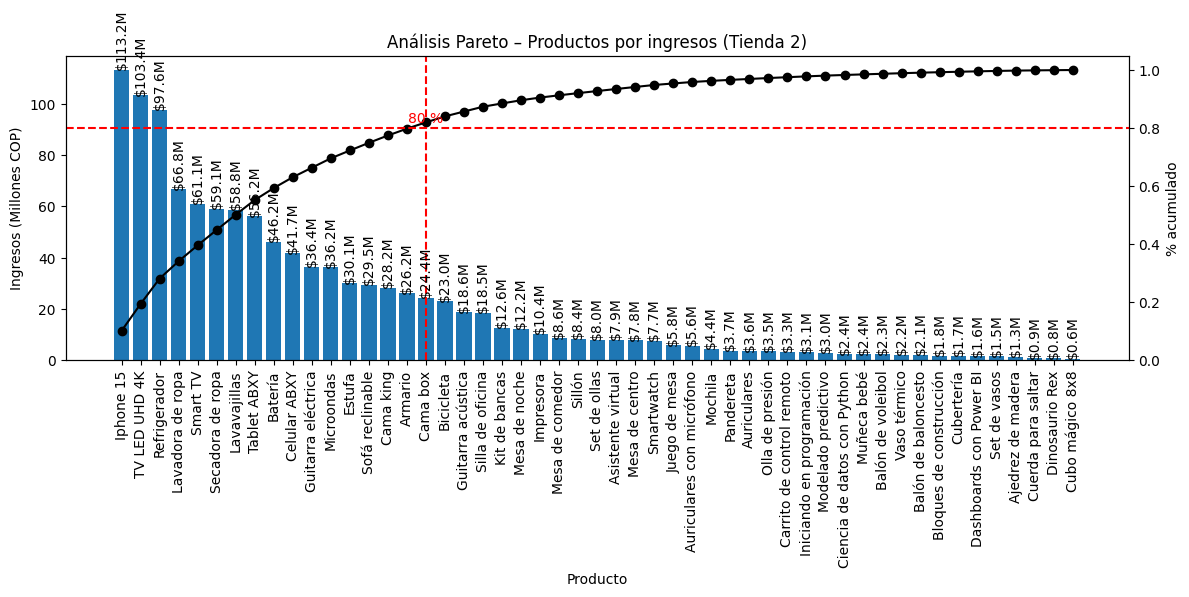

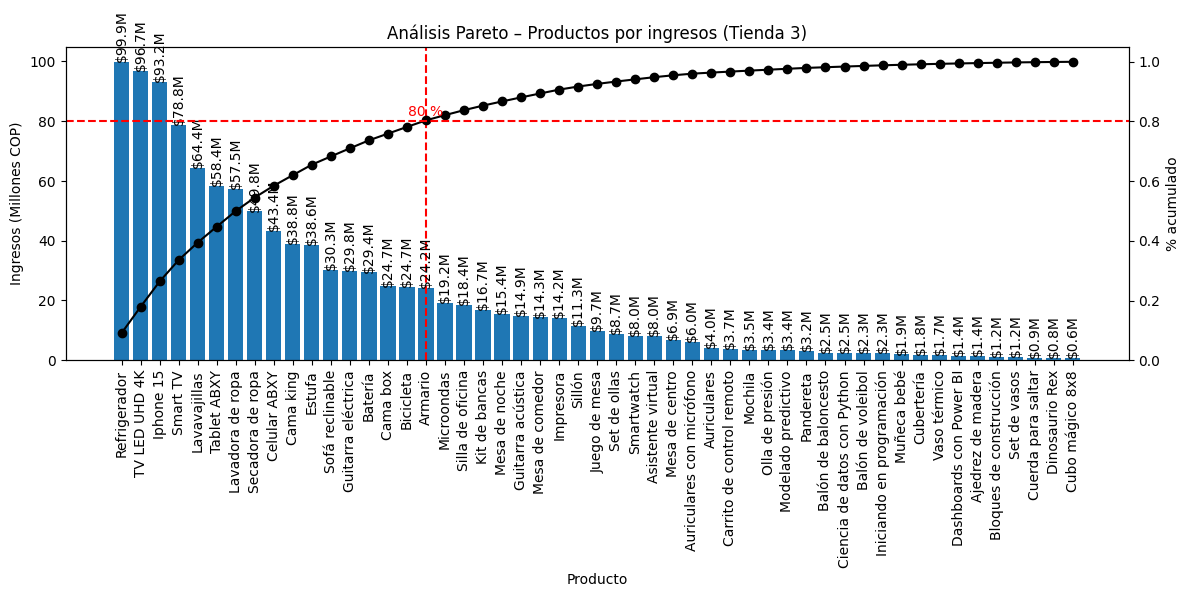

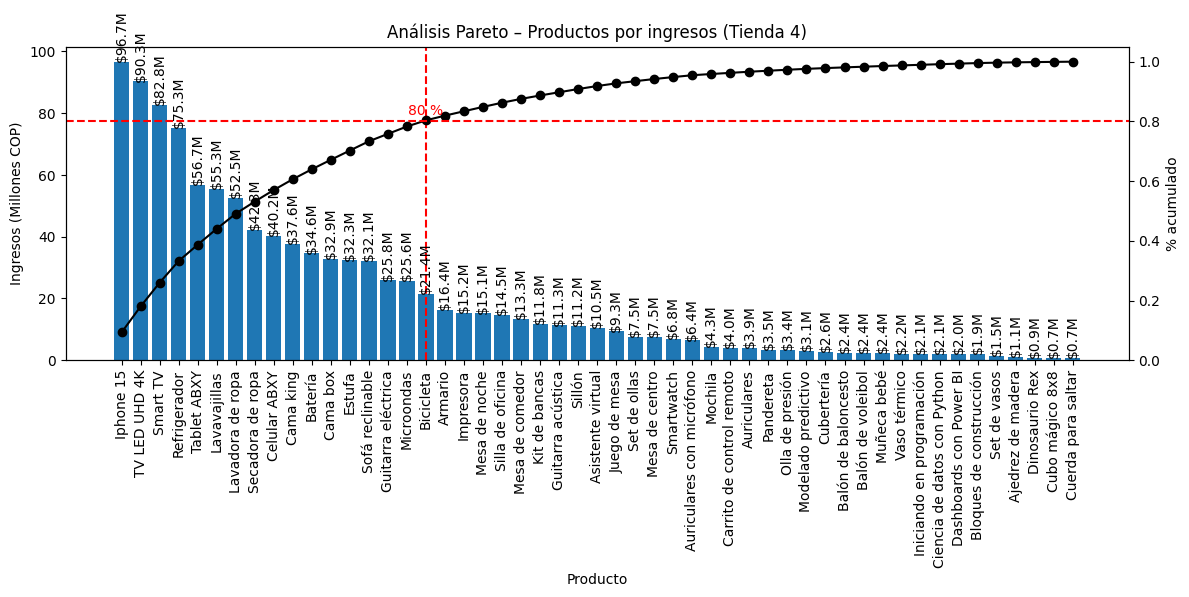

In [51]:
import matplotlib.pyplot as plt

for nombre_tienda, df in resultados.items():

    # =========================
    # Excluir fila TOTAL
    # =========================
    graf = df[df["Producto"] != "TOTAL"].copy()

    # Ingresos en millones
    graf["Ingreso_Millones"] = graf["Ingreso_Total"] / 1_000_000

    fig, ax1 = plt.subplots(figsize=(12, 6))

    # =========================
    # Barras: Ingresos
    # =========================
    barras = ax1.bar(
        graf["Producto"],
        graf["Ingreso_Millones"]
    )

    ax1.set_xlabel("Producto")
    ax1.set_ylabel("Ingresos (Millones COP)")
    ax1.set_title(f"Análisis Pareto – Productos por ingresos ({nombre_tienda})")

    ax1.set_xticks(range(len(graf)))
    ax1.set_xticklabels(graf["Producto"], rotation=90)

    # =========================
    # Etiquetas de barras
    # =========================
    for barra, valor in zip(barras, graf["Ingreso_Millones"]):
        ax1.text(
            barra.get_x() + barra.get_width() / 2,
            valor,
            f"${valor:.1f}M",
            ha="center",
            va="bottom",
            rotation=90
        )

    # =========================
    # Línea: % acumulado
    # =========================
    ax2 = ax1.twinx()
    ax2.plot(
        graf["Producto"],
        graf["% Acumulado"],
        marker='o',
        color="black"
    )
    ax2.set_ylabel("% acumulado")
    ax2.set_ylim(0, 1.05)

    # Línea horizontal del 80 %
    ax2.axhline(0.8, color="red", linestyle="--")

    # =========================
    # 🔴 Línea vertical Pareto (80 %)
    # =========================
    indice_80 = graf[graf["% Acumulado"] >= 0.8].index[0]
    posicion_80 = graf.index.get_loc(indice_80)

    ax1.axvline(
        x=posicion_80,
        color="red",
        linestyle="--"
    )

    ax2.text(
        posicion_80,
        0.82,
        "80 %",
        color="red",
        ha="center"
    )

    plt.tight_layout()
    plt.show()





# 3. Calificación promedio de la tienda


* Las tiendas con mayores ingresos tienden a presentar mejores calificaciones.
* La Tienda 4 tiene una calificación más baja, lo que indica menor satisfacción del cliente y potencial impacto en la fidelización y ventas futuras.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

calificaciones = {}

# Calcular promedio por tienda
for nombre_tienda, df in tiendas.items():
    calificaciones[nombre_tienda] = df["Calificación"].mean()

# Crear tabla resumen
tabla_calificaciones = pd.DataFrame(
    calificaciones.items(),
    columns=["Tienda", "Calificación Promedio"]
)

# Redondear a 2 decimales
tabla_calificaciones["Calificación Promedio"] = (
    tabla_calificaciones["Calificación Promedio"].round(2)
)

# 🔥 ORDENAR DE MAYOR A MENOR
tabla_calificaciones = tabla_calificaciones.sort_values(
    by="Calificación Promedio",
    ascending=False
).reset_index(drop=True)

print("⭐ Calificación promedio de clientes por tienda")
display(tabla_calificaciones)



⭐ Calificación promedio de clientes por tienda


,Tienda,Calificación Promedio
0,Tienda 3,4.05
1,Tienda 2,4.04
2,Tienda 4,4.00
3,Tienda 1,3.98


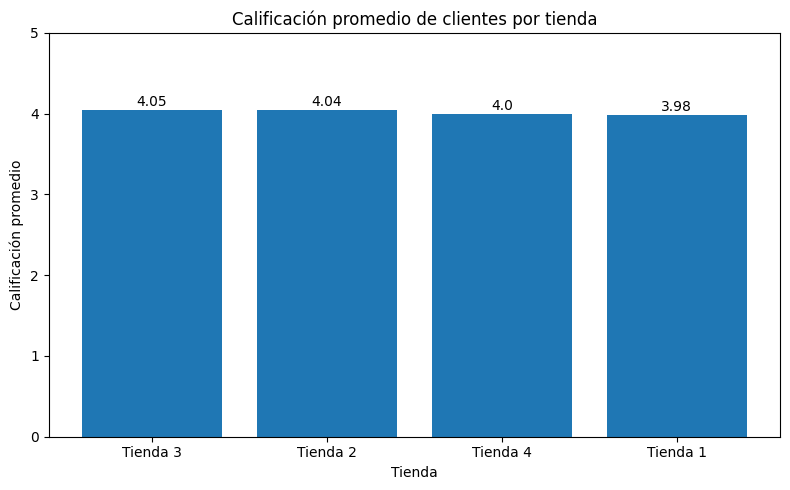

In [34]:
plt.figure(figsize=(8, 5))
plt.bar(
    tabla_calificaciones["Tienda"],
    tabla_calificaciones["Calificación Promedio"]
)

plt.title("Calificación promedio de clientes por tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificación promedio")
plt.ylim(0, 5)

# Etiquetas de datos
for i, valor in enumerate(tabla_calificaciones["Calificación Promedio"]):
    plt.text(i, valor + 0.05, valor, ha="center")

plt.tight_layout()
plt.show()



# 4. Productos más y menos vendidos

Al analizar la distribución de ventas por categoría y producto:

+ Las tiendas con mejor desempeño concentran la mayor parte de las ventas en categorías clave, mientras que la Tienda 4 depende más de productos de menor volumen.

+ Esto refleja una oferta de productos menos alineada con la demanda del mercado en la Tienda 4.

In [39]:
import pandas as pd

tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

resultados_ventas = {}

for nombre_tienda, df in tiendas.items():

    resumen = (
        df
        .groupby("Producto")
        .size()
        .reset_index(name="Cantidad_Vendida")
        .sort_values(by="Cantidad_Vendida", ascending=False)
    )

    top_mas = resumen.head(5)
    top_menos = resumen.tail(5).sort_values(by="Cantidad_Vendida")

    resultados_ventas[nombre_tienda] = {
        "mas_vendidos": top_mas,
        "menos_vendidos": top_menos
    }

    print(f"\n📋 {nombre_tienda} – Productos MÁS vendidos")
    display(top_mas)

    print(f"\n📋 {nombre_tienda} – Productos MENOS vendidos")
    display(top_menos)



📋 Tienda 1 – Productos MÁS vendidos


,Producto,Cantidad_Vendida
1,Armario,60
48,TV LED UHD 4K,60
33,Microondas,60
40,Secadora de ropa,58
32,Mesa de noche,56



📋 Tienda 1 – Productos MENOS vendidos


,Producto,Cantidad_Vendida
13,Celular ABXY,33
4,Auriculares con micrófono,33
37,Olla de presión,35
38,Pandereta,36
34,Mochila,39



📋 Tienda 2 – Productos MÁS vendidos


,Producto,Cantidad_Vendida
24,Iniciando en programación,65
33,Microondas,62
7,Batería,61
38,Pandereta,58
21,Guitarra acústica,58



📋 Tienda 2 – Productos MENOS vendidos


,Producto,Cantidad_Vendida
26,Juego de mesa,32
31,Mesa de comedor,34
23,Impresora,34
44,Sillón,35
3,Auriculares,37



📋 Tienda 3 – Productos MÁS vendidos


,Producto,Cantidad_Vendida
27,Kit de bancas,57
31,Mesa de comedor,56
11,Cama king,56
41,Set de ollas,55
32,Mesa de noche,55



📋 Tienda 3 – Productos MENOS vendidos


,Producto,Cantidad_Vendida
9,Bloques de construcción,35
34,Mochila,36
42,Set de vasos,36
33,Microondas,36
22,Guitarra eléctrica,38



📋 Tienda 4 – Productos MÁS vendidos


,Producto,Cantidad_Vendida
10,Cama box,62
15,Cubertería,59
11,Cama king,56
18,Dashboards con Power BI,56
12,Carrito de control remoto,55



📋 Tienda 4 – Productos MENOS vendidos


,Producto,Cantidad_Vendida
22,Guitarra eléctrica,33
1,Armario,34
21,Guitarra acústica,37
39,Refrigerador,38
14,Ciencia de datos con Python,38


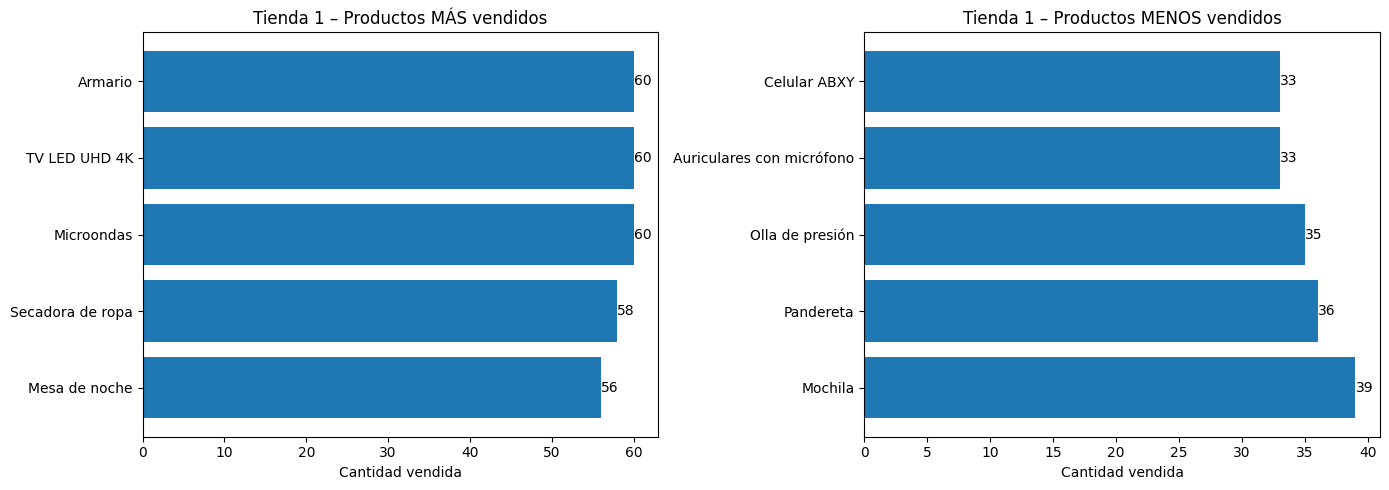

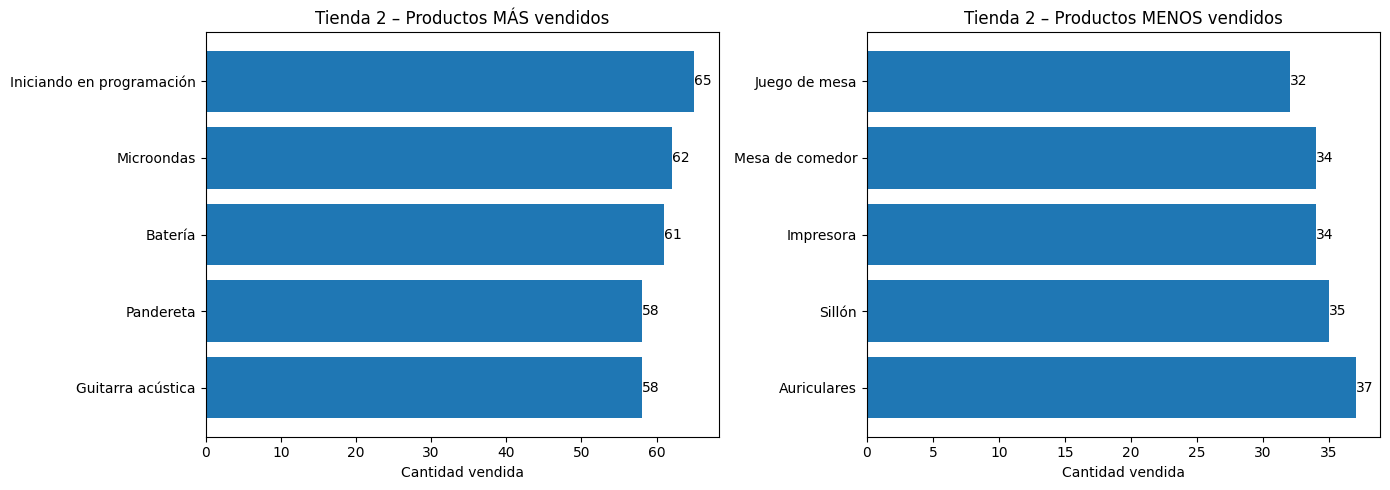

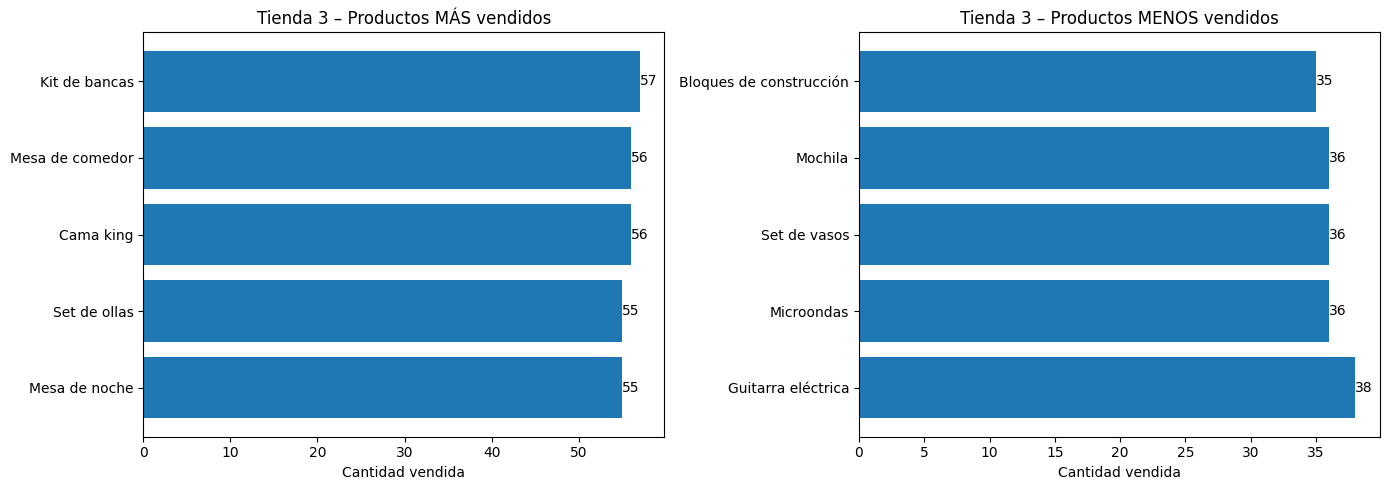

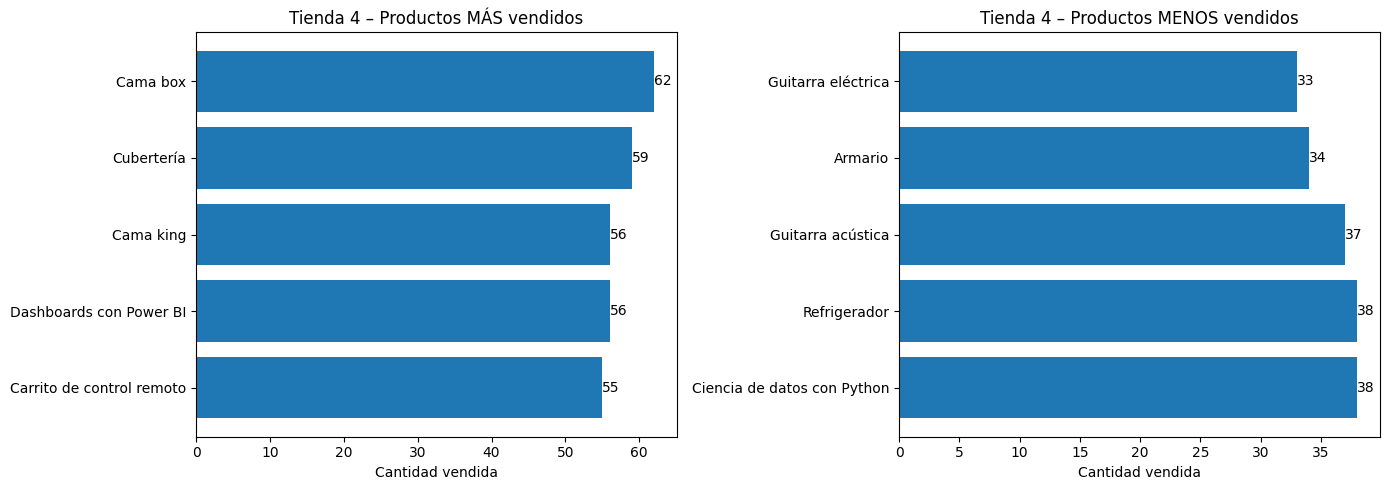

In [40]:
import matplotlib.pyplot as plt

for nombre_tienda, datos in resultados_ventas.items():

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # =========================
    # MÁS VENDIDOS
    # =========================
    mas = datos["mas_vendidos"]

    axes[0].barh(
        mas["Producto"],
        mas["Cantidad_Vendida"]
    )
    axes[0].invert_yaxis()
    axes[0].set_title(f"{nombre_tienda} – Productos MÁS vendidos")
    axes[0].set_xlabel("Cantidad vendida")

    for i, valor in enumerate(mas["Cantidad_Vendida"]):
        axes[0].text(valor, i, valor, va="center")

    # =========================
    # MENOS VENDIDOS
    # =========================
    menos = datos["menos_vendidos"]

    axes[1].barh(
        menos["Producto"],
        menos["Cantidad_Vendida"]
    )
    axes[1].invert_yaxis()
    axes[1].set_title(f"{nombre_tienda} – Productos MENOS vendidos")
    axes[1].set_xlabel("Cantidad vendida")

    for i, valor in enumerate(menos["Cantidad_Vendida"]):
        axes[1].text(valor, i, valor, va="center")

    plt.tight_layout()
    plt.show()


# 5. Envío promedio por tienda

* Aunque el costo de envío es asumido por el cliente, este influye en la percepción del servicio y la competitividad de la tienda.
* La Tienda 4 presenta un costo promedio de envío más bajo que las demás, pero combinado con menores ingresos y calificaciones, sigue siendo menos competitiva.

In [46]:
import pandas as pd

tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

costos_envio = {}

for nombre_tienda, df in tiendas.items():
    costos_envio[nombre_tienda] = df["Costo de envío"].mean()

# Crear tabla resumen
tabla_envios = (
    pd.DataFrame(costos_envio.items(), columns=["Tienda", "Costo Promedio Envío"])
    .sort_values(by="Costo Promedio Envío", ascending=False)
)

# Formato moneda
tabla_envios["Costo Promedio Envío"] = tabla_envios["Costo Promedio Envío"].map(
    lambda x: f"${x:,.0f} COP"
)

print("🚚 Costo promedio de envío por tienda")
display(tabla_envios)


🚚 Costo promedio de envío por tienda


,Tienda,Costo Promedio Envío
0,Tienda 1,"$26,019 COP"
1,Tienda 2,"$25,216 COP"
2,Tienda 3,"$24,806 COP"
3,Tienda 4,"$23,459 COP"


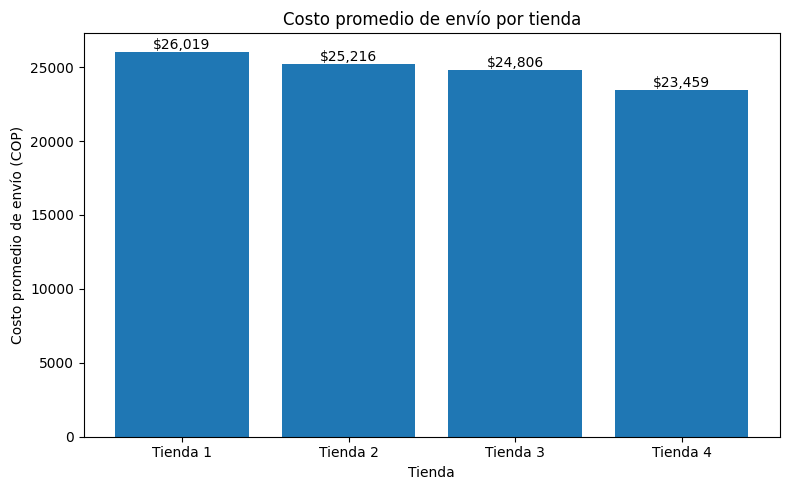

In [47]:
import matplotlib.pyplot as plt

# Volver a valores numéricos para graficar
tabla_graf = (
    pd.DataFrame(costos_envio.items(), columns=["Tienda", "Costo"])
    .sort_values(by="Costo", ascending=False)
)

plt.figure(figsize=(8, 5))

barras = plt.bar(
    tabla_graf["Tienda"],
    tabla_graf["Costo"]
)

plt.title("Costo promedio de envío por tienda")
plt.xlabel("Tienda")
plt.ylabel("Costo promedio de envío (COP)")

# Etiquetas
for barra, valor in zip(barras, tabla_graf["Costo"]):
    plt.text(
        barra.get_x() + barra.get_width() / 2,
        valor,
        f"${valor:,.0f}",
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()


# 6. Datos Generales

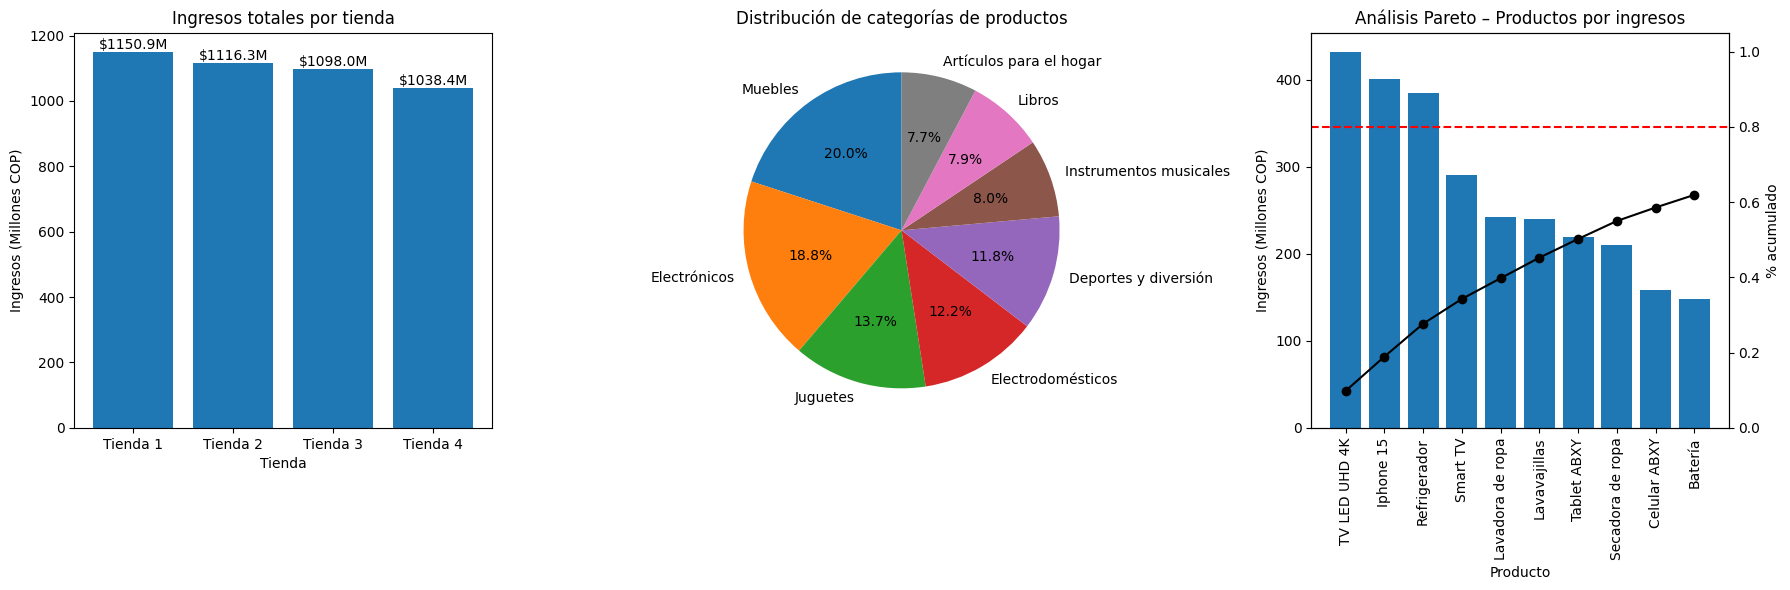

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# =========================
# 1. PREPARACIÓN DE DATOS
# =========================

# ---- Ingresos por tienda ----
tabla_ingresos = (
    pd.DataFrame(ingresos.items(), columns=["Tienda", "Ingreso"])
    .sort_values(by="Ingreso", ascending=False)
)

tabla_ingresos["Ingreso_Millones"] = tabla_ingresos["Ingreso"] / 1_000_000

# ---- Consolidado de todas las tiendas ----
df_total = pd.concat([tienda, tienda2, tienda3, tienda4])

# ---- Distribución por categoría ----
categorias = df_total["Categoría del Producto"].value_counts()

# ---- Pareto por producto ----
pareto = (
    df_total
    .groupby("Producto")
    .agg(Ingreso_Total=("Precio", "sum"))
    .sort_values(by="Ingreso_Total", ascending=False)
    .reset_index()
)

pareto["Ingreso_Millones"] = pareto["Ingreso_Total"] / 1_000_000
pareto["% Participación"] = pareto["Ingreso_Total"] / pareto["Ingreso_Total"].sum()
pareto["% Acumulado"] = pareto["% Participación"].cumsum()

pareto = pareto.head(10)

# =========================
# 2. VISUALIZACIONES
# =========================

fig = plt.figure(figsize=(18, 6))

# =========================
# GRÁFICO 1 – Ingresos por tienda
# =========================
ax1 = fig.add_subplot(1, 3, 1)

barras = ax1.bar(
    tabla_ingresos["Tienda"],
    tabla_ingresos["Ingreso_Millones"]
)

ax1.set_title("Ingresos totales por tienda")
ax1.set_xlabel("Tienda")
ax1.set_ylabel("Ingresos (Millones COP)")

for barra, valor in zip(barras, tabla_ingresos["Ingreso_Millones"]):
    ax1.text(
        barra.get_x() + barra.get_width() / 2,
        valor,
        f"${valor:.1f}M",
        ha="center",
        va="bottom"
    )

# =========================
# GRÁFICO 2 – Distribución de categorías
# =========================
ax2 = fig.add_subplot(1, 3, 2)

ax2.pie(
    categorias,
    labels=categorias.index,
    autopct="%1.1f%%",
    startangle=90
)

ax2.set_title("Distribución de categorías de productos")

# =========================
# GRÁFICO 3 – Pareto de productos
# =========================
ax3 = fig.add_subplot(1, 3, 3)

ax3.bar(
    pareto["Producto"],
    pareto["Ingreso_Millones"]
)

ax3.set_xlabel("Producto")
ax3.set_ylabel("Ingresos (Millones COP)")
ax3.tick_params(axis="x", rotation=90)

ax4 = ax3.twinx()
ax4.plot(
    pareto["Producto"],
    pareto["% Acumulado"],
    marker="o",
    color="black"
)
ax4.set_ylabel("% acumulado")
ax4.set_ylim(0, 1.05)
ax4.axhline(0.8, linestyle="--", color="red")

ax3.set_title("Análisis Pareto – Productos por ingresos")

plt.tight_layout()
plt.show()


# 7. Conclusión y Recomendación

Con base en el análisis integral:

✅ Se recomienda que el Sr. Juan venda la Tienda 4.

Justificación:

* Es la tienda con menores ingresos totales.
* Presenta menor participación en los productos más vendidos.
* Tiene calificaciones promedio de clientes más bajas.
* Sus productos generan menor volumen de ventas y menor aporte económico.
* Aunque su costo de envío es relativamente bajo, esto no compensa las debilidades en ventas y satisfacción del cliente.
* Las tiendas 1, 2 y 3 presentan un desempeño sólido, mayor alineación con la demanda del mercado y mejores indicadores de satisfacción del cliente.
